# Exploratory Data Analysis

## Data Overview

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## !pip install missingno
import missingno as msno
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [4]:
# Load dataset
df = pd.read_csv('diabetes.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Check missing values
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


By taking a look at the original dataset, the missing value are in Glucose, BloodPressure, SkinThickness, Insulin, and BMI as zeros instead of "null". 

In [7]:
# Replace zero values with NaN in specific columns
missing_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[missing_cols] = df[missing_cols].replace(0, np.nan)

# Check missing values again
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
# Summary statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Visulizations

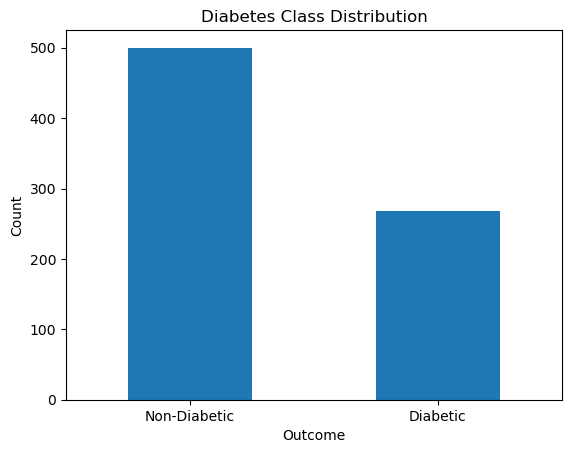

In [10]:
# Check for class imbalance issue for target feature
df['Outcome'].value_counts().plot(kind='bar', title='Diabetes Class Distribution')

# Set x-axis labels
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'], rotation=0)

# Add y-axis label
plt.ylabel("Count")

# Show the plot
plt.show()

There is a class inbalance issue where we have almost double the amount of non-diabetic cases than diabetic ones. 

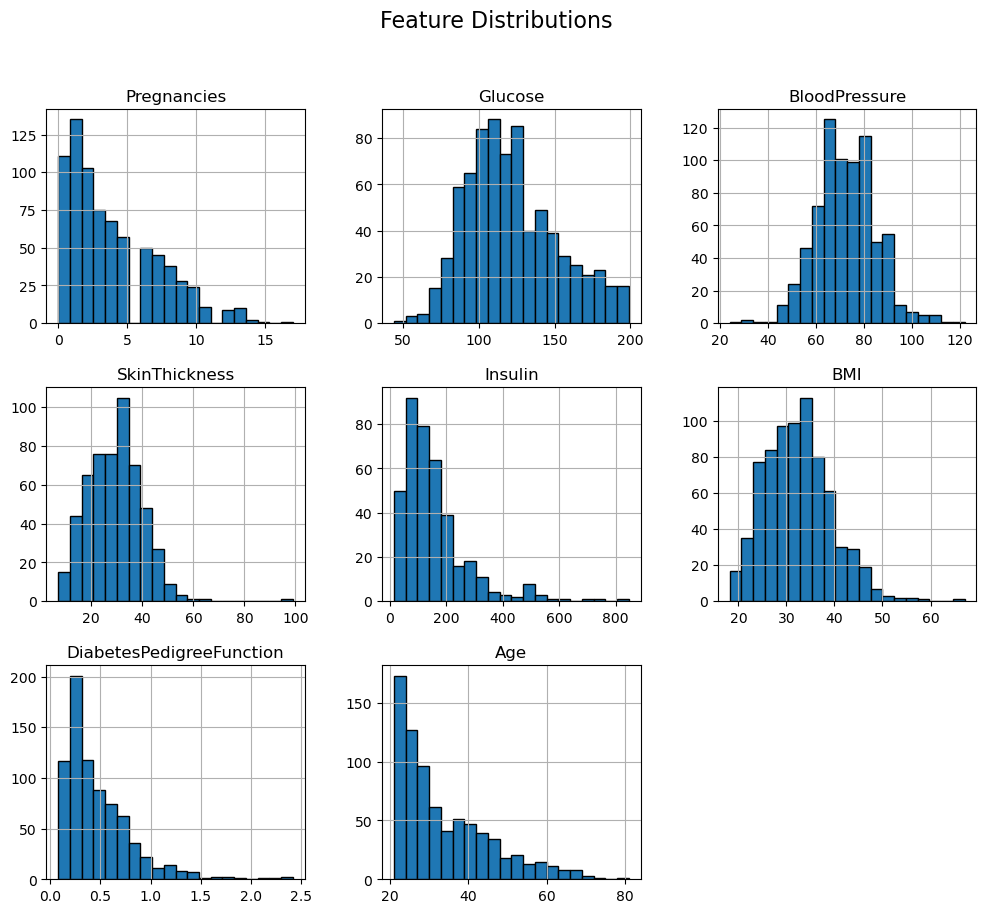

In [12]:
# Plot histograms to check feature distributions
# Exclude Outcome from the histogram
df.drop(columns=["Outcome"]).hist(figsize=(12, 10), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)

# Show plot
plt.show()

Pregnacies, Insulin, DiabetesPedigreeFunction, and Age are strongly right-skewed. 

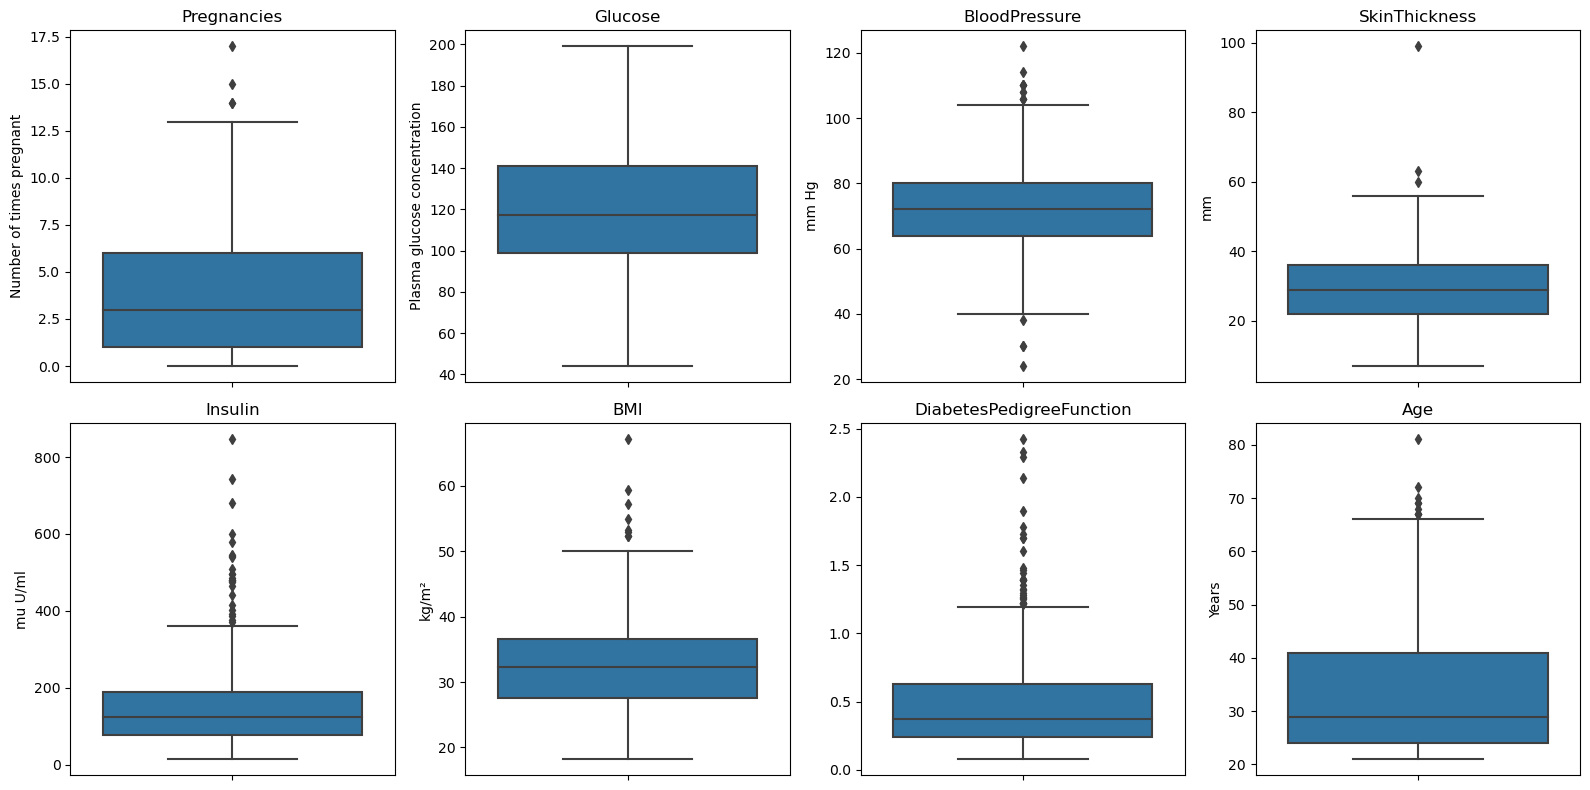

In [14]:
# Boxplots
# Define the ordered features (same as in the histogram)
ordered_features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
                    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Define custom y-axis labels
y_labels = {
    "Pregnancies": "Number of times pregnant",
    "Glucose": "Plasma glucose concentration",
    "BloodPressure": "mm Hg",
    "SkinThickness": "mm",
    "Insulin": "mu U/ml",
    "BMI": "kg/m²",
    "DiabetesPedigreeFunction": None,  # No y-label needed
    "Age": "Years"
}

# Set figure size
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # 2 rows, 4 columns

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each feature in the defined order
for i, col in enumerate(ordered_features):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)
    
    # Set y-axis label only if defined in the dictionary
    if y_labels[col]:
        axes[i].set_ylabel(y_labels[col])
    else:
        axes[i].set_ylabel("")

# Hide any unused subplots (if any)
for j in range(len(ordered_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We see outliters in multiple features:
- A few participants with extremely high TSF (Triceps skin fold thickness) thickness (average TSF thickness for women: 23.6 ± 7.5 mm)
- Many participants with extremely high insulin levels
- Many participants with high BMI
- Many participants with extremely high DiabetesPedigreeFunction, meaning high probability of diabetes based on family history
- A few participants with extremely high number of pregnancies

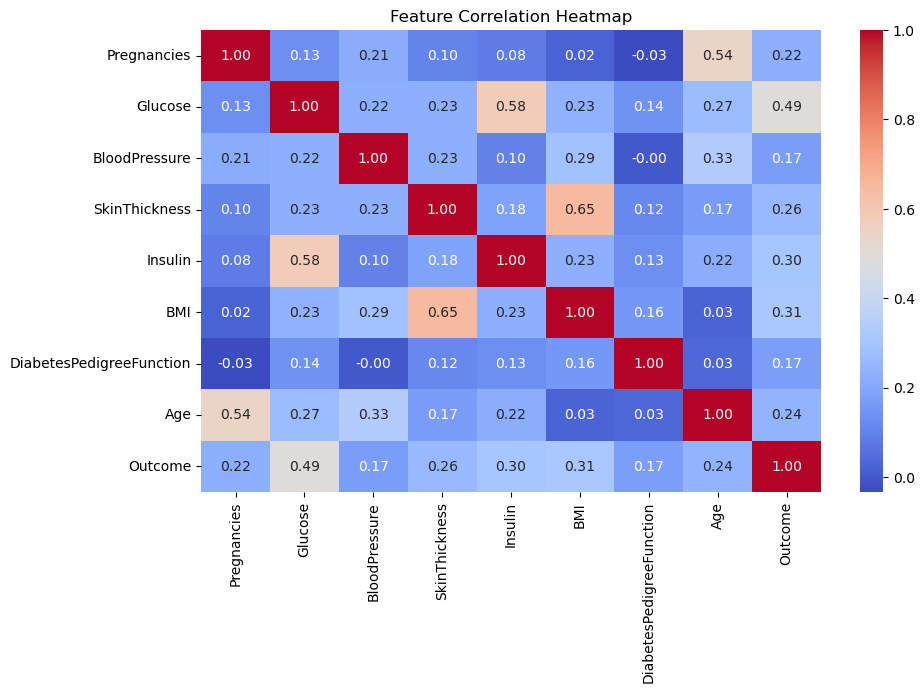

In [16]:
# Check correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

According to the correlation heatmap:
- Glucose has the highest correlation with Diabetes outcome
- BloodPressure  and DiabetesPedigreeFunction have the weakest correlations with outcome

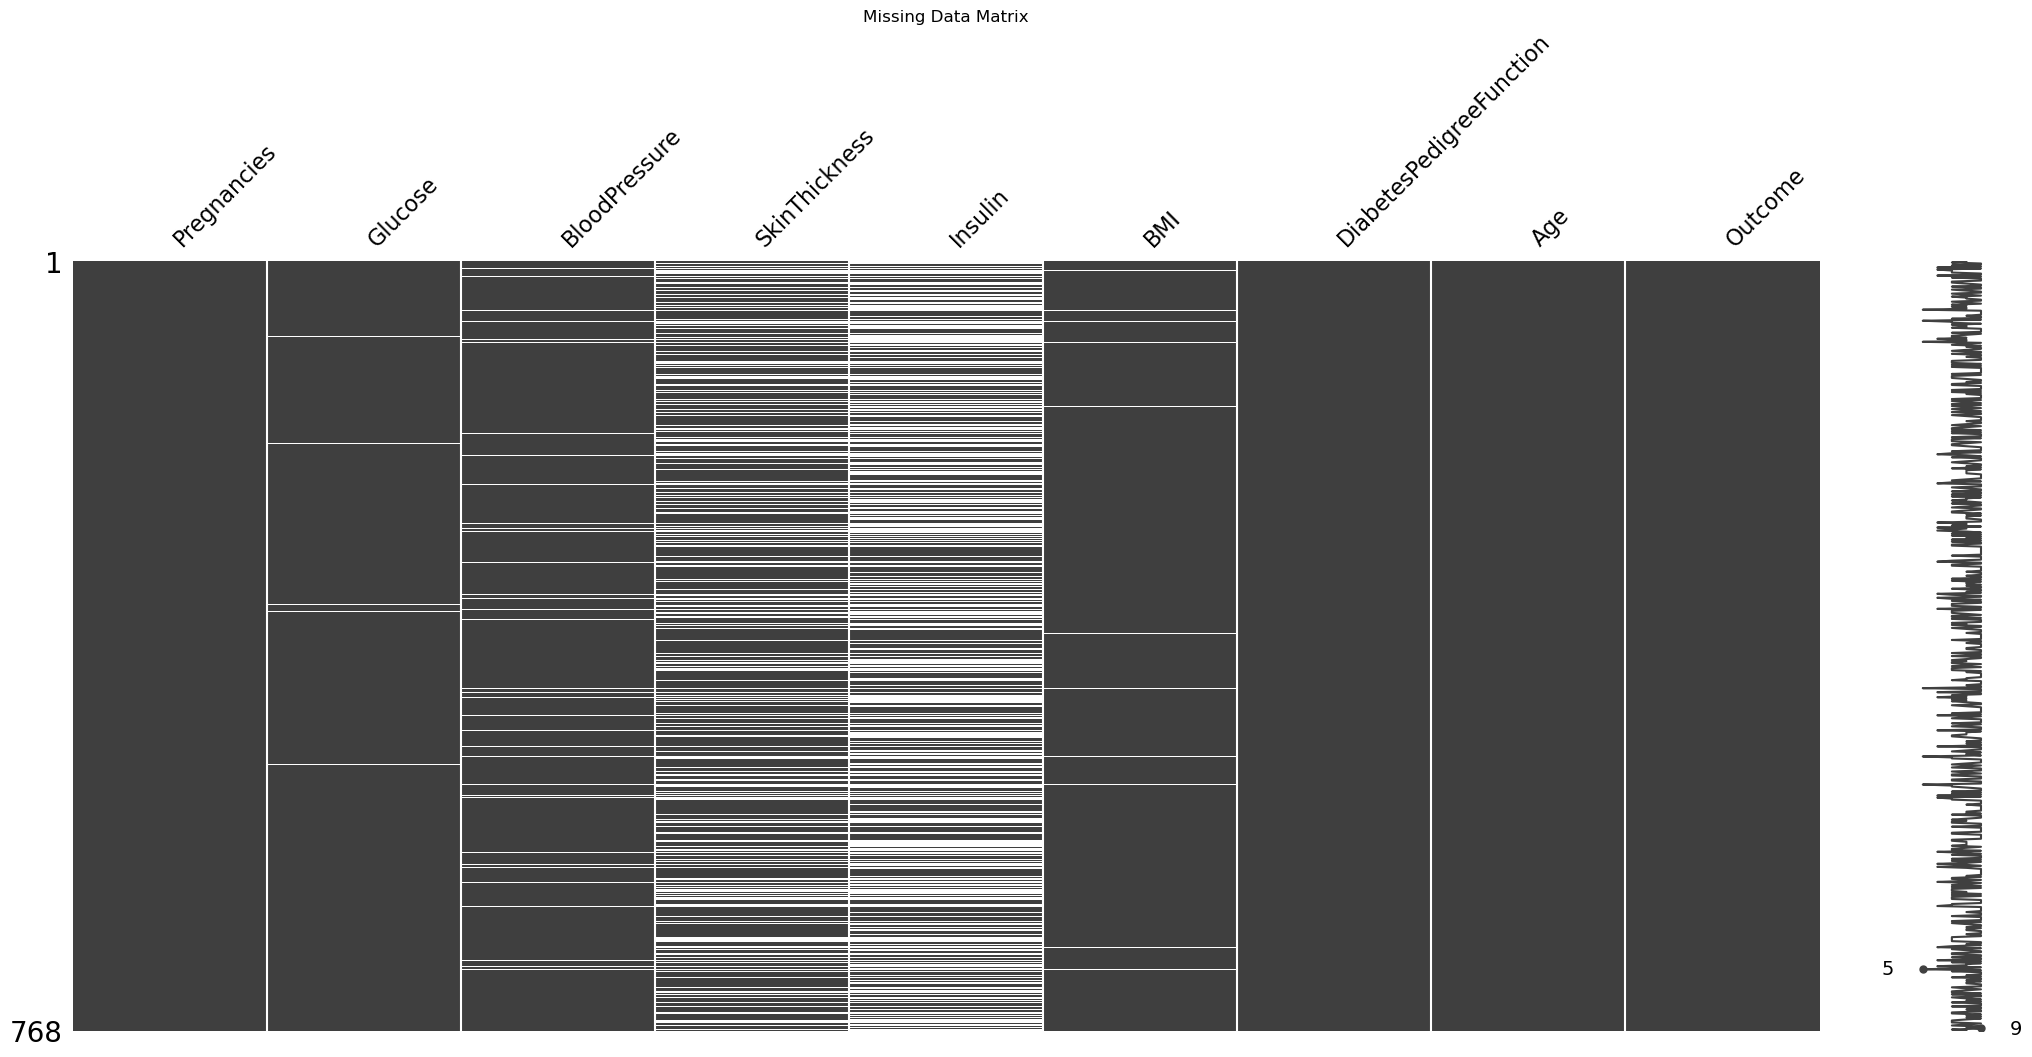

In [18]:
# Visualizing missing data matrix
msno.matrix(df)
plt.title("Missing Data Matrix")
plt.show()

## Handling Missing Values

### Method 1: Replace All NA with Median

In [21]:
from sklearn.impute import SimpleImputer

# Create a copy of the dataset for median imputation
df_median = df.copy()

# Define median imputer
median_imputer = SimpleImputer(strategy="median")

# Apply median imputation to all variables with missing values
df_median[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = median_imputer.fit_transform(
    df_median[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]
)

# Check if missing values remain
print("Missing Values After Median Imputation:\n", df_median.isnull().sum())

Missing Values After Median Imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Method 2: Predict NA using Machine Learning

In [23]:
from sklearn.linear_model import LinearRegression

# Create a copy of the dataset for model-based imputation
df_model = df.copy()

# Define features to predict
features_to_predict = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Loop through each feature and predict missing values
for feature in features_to_predict:
    print(f"Predicting missing values for: {feature}")
    
    # Step 1: Split data into known & unknown values
    train_data = df_model[df_model[feature].notnull()]
    test_data = df_model[df_model[feature].isnull()]
    
    # Step 2: Define input features (excluding target & missing value columns)
    X_train = train_data.drop(columns=features_to_predict + ['Outcome'])  
    y_train = train_data[feature]
    X_test = test_data.drop(columns=features_to_predict + ['Outcome'])
    
    # Step 3: Train regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Step 4: Predict missing values
    df_model.loc[df_model[feature].isnull(), feature] = model.predict(X_test)

# Check if missing values remain
print("Missing Values After Model-Based Imputation:\n", df_model.isnull().sum())


Predicting missing values for: Glucose
Predicting missing values for: BloodPressure
Predicting missing values for: SkinThickness
Predicting missing values for: Insulin
Predicting missing values for: BMI
Missing Values After Model-Based Imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Compare Distributions After Both Methods

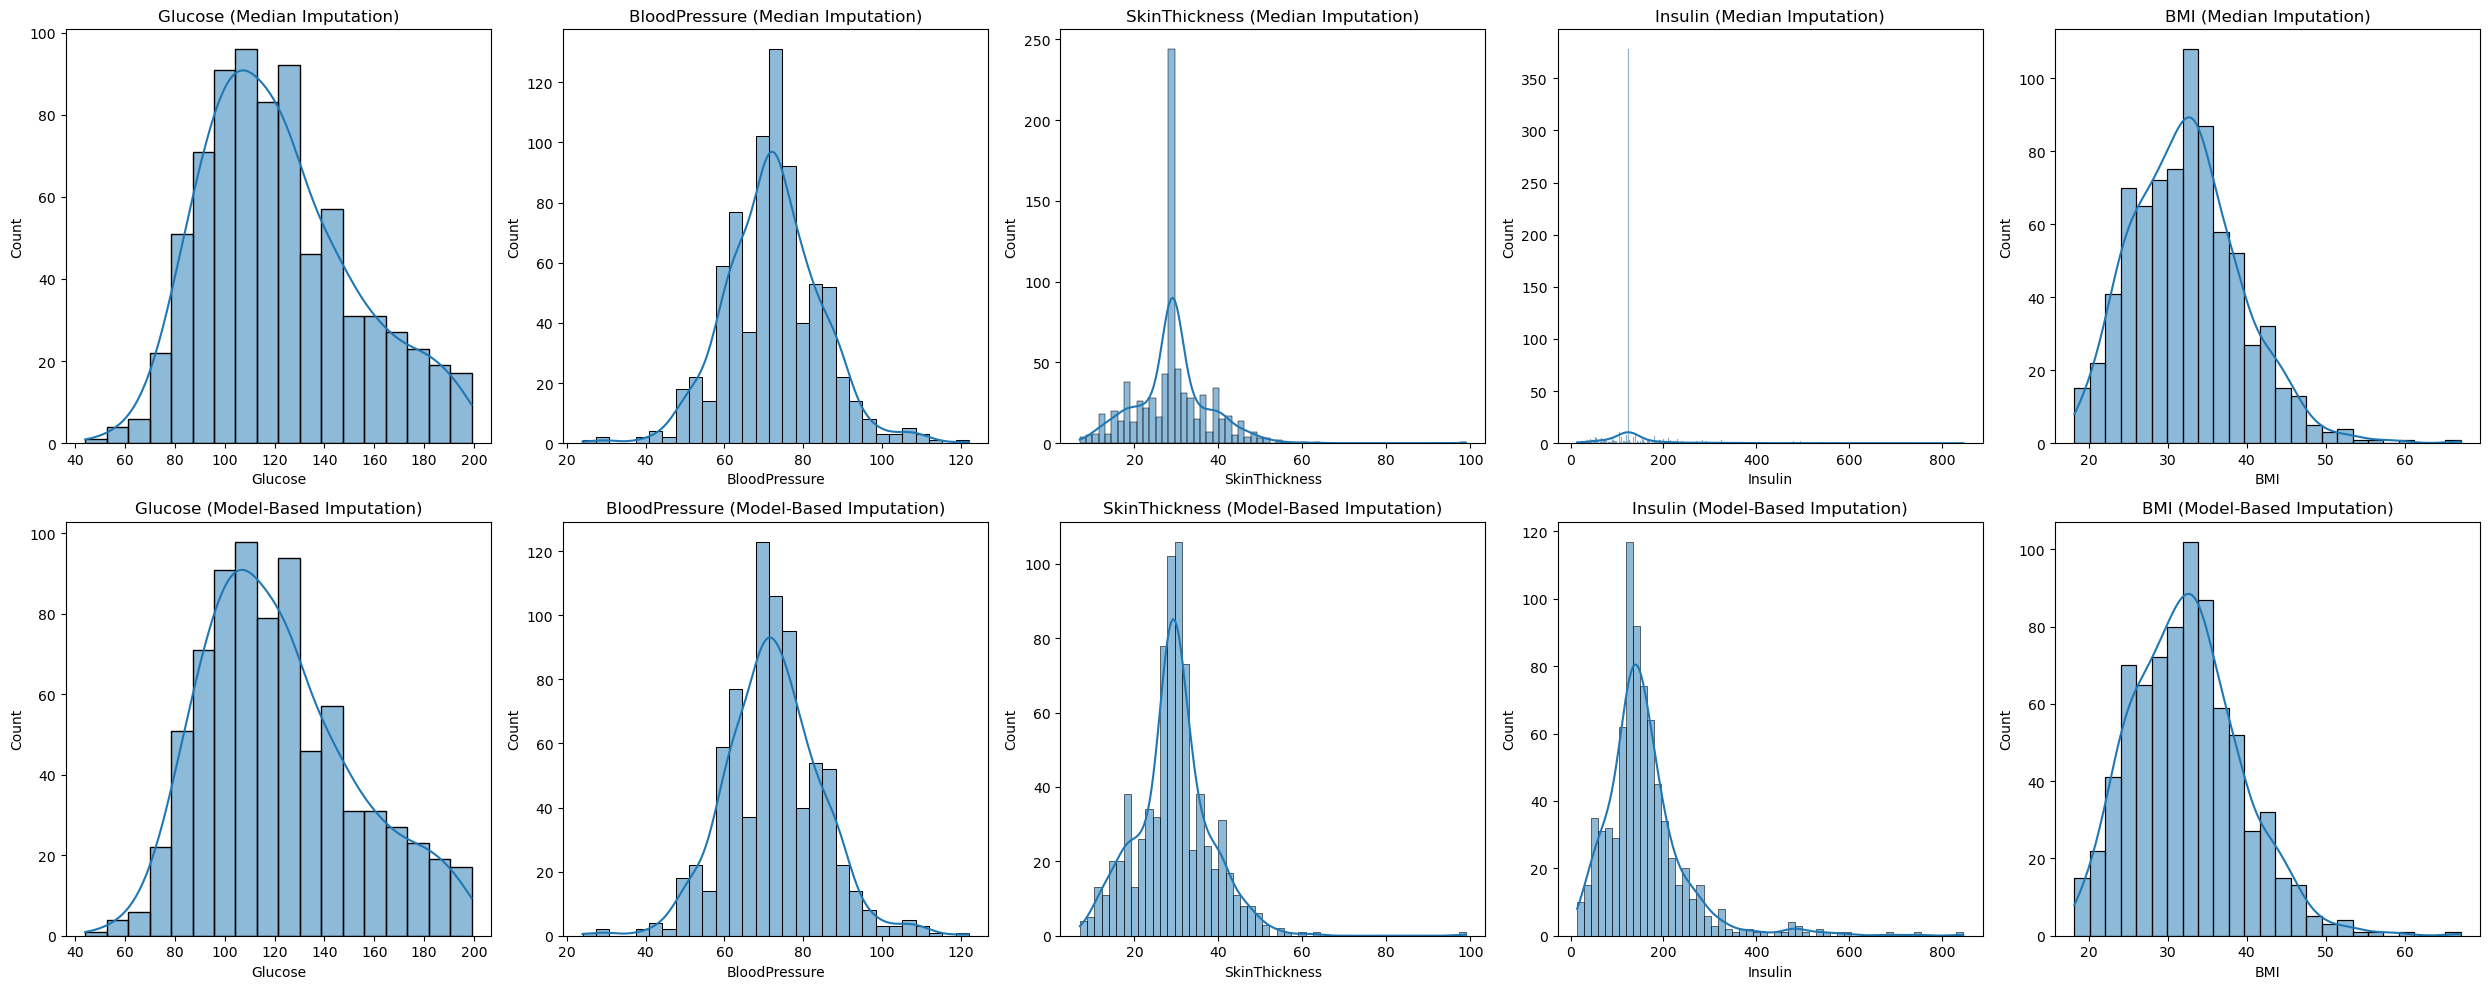

In [25]:
# Create subplots for comparison
fig, axes = plt.subplots(2, 5, figsize=(25, 10))

for i, col in enumerate(features_to_predict):
    sns.histplot(df_median[col], kde=True, ax=axes[0, i])
    axes[0, i].set_title(f"{col} (Median Imputation)")
    
    sns.histplot(df_model[col], kde=True, ax=axes[1, i])
    axes[1, i].set_title(f"{col} (Model-Based Imputation)")

plt.tight_layout()
plt.show()

From the result above, we will choose the **Model-Based Imputation (df_model)**. This method better preserves the original distributions of the features, which is crucial for subsequent analyses like identifying interaction terms and building regression models. The smoother distributions suggest that the linear regression imputation leverages relationships between features to estimate missing values more realistically

## Check for Multicollinearity

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numerical features (excluding Outcome)
X_median = df_median.drop(columns=['Outcome'])

# Compute VIF for each feature
vif_data_median = pd.DataFrame()
vif_data_median["Feature"] = X_median.columns
vif_data_median["VIF"] = [variance_inflation_factor(X_median.values, i) for i in range(len(X_median.columns))]

# Display results
print("VIF Results for Median Imputation:")
print(vif_data_median)

VIF Results for Median Imputation:
                    Feature        VIF
0               Pregnancies   3.273488
1                   Glucose  21.723850
2             BloodPressure  31.717477
3             SkinThickness  17.321002
4                   Insulin   4.528320
5                       BMI  33.678170
6  DiabetesPedigreeFunction   3.153079
7                       Age  14.357379


In [29]:
# Select numerical features (excluding Outcome)
X_model = df_model.drop(columns=['Outcome'])

# Compute VIF for each feature
vif_data_model = pd.DataFrame()
vif_data_model["Feature"] = X_model.columns
vif_data_model["VIF"] = [variance_inflation_factor(X_model.values, i) for i in range(len(X_model.columns))]

# Display results
print("VIF Results for Model-Based Imputation:")
print(vif_data_model)


VIF Results for Model-Based Imputation:
                    Feature        VIF
0               Pregnancies   3.341412
1                   Glucose  21.060911
2             BloodPressure  32.113928
3             SkinThickness  17.737475
4                   Insulin   5.822412
5                       BMI  33.102557
6  DiabetesPedigreeFunction   3.170928
7                       Age  16.302489


The VIF for Glucose, BloodPressure, SkinThickness, BMI, and Age are over 10, suggesting severe multicollinearity

## Code Dummy Variable: Age

According to previous medical research, it suggests that divide the age into 4 groups:

| Age Range | Category    | Clinical Relevance                                          |
|-----------|------------|--------------------------------------------------------------|
| 18 - 30   | Young       | Low diabetes risk, but rising in obesity cases              |
| 31 - 45   | Middle-aged | Increased metabolic changes, lifestyle factors impact risk  |
| 46 - 60   | Older       | Higher risk due to insulin resistance                       |
| 61+       | Senior      | Age-related diabetes onset & complications                  |


In [33]:
# Use df_model as the working dataset
df_working = df_model.copy()

# Create Age_Group categorical column
bins = [17, 30, 45, 60, np.inf]
labels = ['Young', 'Middle-aged', 'Older', 'Senior']
df_working['Age_Group'] = pd.cut(df_working['Age'], bins=bins, labels=labels)

# Generate dummy variables for Age_Group (drop_first=True to avoid multicollinearity)
age_dummies = pd.get_dummies(df_working['Age_Group'], prefix='Age', drop_first=True)

# Convert boolean dummies to integers (0/1) immediately to avoid future issues
age_dummies = age_dummies.astype(int)

# Concatenate the dummy variables to the DataFrame
df_working = pd.concat([df_working, age_dummies], axis=1)

# Verify the columns and data types
print("Columns in df_working after adding dummies:")
print(df_working.columns)
print("\nData types in df_working:")
print(df_working.dtypes)

Columns in df_working after adding dummies:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Age_Group',
       'Age_Middle-aged', 'Age_Older', 'Age_Senior'],
      dtype='object')

Data types in df_working:
Pregnancies                    int64
Glucose                      float64
BloodPressure                float64
SkinThickness                float64
Insulin                      float64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                        int64
Age_Group                   category
Age_Middle-aged                int64
Age_Older                      int64
Age_Senior                     int64
dtype: object


## Address Multicollinearity and Build Logistic Regression

In [35]:
# Define IVs (exclude 'Outcome', 'Age' and 'Age_Group')
ivs = [col for col in df_working.columns if col not in ['Outcome', 'Age_Group', 'Age']]

X = df_working[ivs].copy()

def calculate_vif(dataframe):
    """Calculate VIF for each feature in the dataframe."""
    vif_df = pd.DataFrame()
    vif_df["Feature"] = dataframe.columns
    vif_df["VIF"] = [variance_inflation_factor(dataframe.values, i)
                     for i in range(dataframe.shape[1])]
    return vif_df

# Set a threshold for VIF (commonly 5 or 10)
vif_threshold = 5.0

print("Initial VIF values:")
print(calculate_vif(X))

# Iteratively drop features with VIF greater than the threshold
while True:
    vif_df = calculate_vif(X)
    max_vif = vif_df["VIF"].max()
    if max_vif > vif_threshold:
        # Identify feature with the highest VIF
        feature_to_drop = vif_df.sort_values("VIF", ascending=False)["Feature"].iloc[0]
        print(f"Dropping {feature_to_drop} with VIF: {max_vif:.2f}")
        X.drop(columns=[feature_to_drop], inplace=True)
    else:
        break

print("Final features after dropping high VIF terms:")
print(X.columns)

# Add constant for intercept
X_final = sm.add_constant(X)

# Define the target variable
y = df_working['Outcome']

Initial VIF values:
                    Feature        VIF
0               Pregnancies   3.681999
1                   Glucose  20.864807
2             BloodPressure  27.784469
3             SkinThickness  17.814627
4                   Insulin   5.841517
5                       BMI  34.915776
6  DiabetesPedigreeFunction   3.192073
7           Age_Middle-aged   2.285006
8                 Age_Older   1.797227
9                Age_Senior   1.256432
Dropping BMI with VIF: 34.92
Dropping BloodPressure with VIF: 20.71
Dropping Glucose with VIF: 13.48
Dropping SkinThickness with VIF: 5.85
Final features after dropping high VIF terms:
Index(['Pregnancies', 'Insulin', 'DiabetesPedigreeFunction', 'Age_Middle-aged',
       'Age_Older', 'Age_Senior'],
      dtype='object')


In [36]:
# Fit the final logistic regression model using statsmodels
final_model = sm.Logit(y, X_final).fit(maxiter=1000)
print(final_model.summary2())

Optimization terminated successfully.
         Current function value: 0.566755
         Iterations 6
                             Results: Logit
Model:                  Logit              Method:             MLE       
Dependent Variable:     Outcome            Pseudo R-squared:   0.124     
Date:                   2025-03-09 21:48   AIC:                884.5359  
No. Observations:       768                BIC:                917.0424  
Df Model:               6                  Log-Likelihood:     -435.27   
Df Residuals:           761                LL-Null:            -496.74   
Converged:              1.0000             LLR p-value:        3.9143e-24
No. Iterations:         6.0000             Scale:              1.0000    
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
const                    -2.5591   0.247

This final logistic regression model uses six predictors—`Pregnancies`, `Insulin`, `DiabetesPedigreeFunction`, and three `age group` dummies—to predict the outcome. The model shows that higher values of `Pregnancies`, `Insulin`, and `DiabetesPedigreeFunction` significantly increase the odds of the outcome. Being middle-aged or older (relative to the young group) is also associated with higher odds, while the senior age group is not significantly different.

## Build Random Forest Model for All Features

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [40]:
# define data set (exclude 'Age' and 'Age_Group')
df_working2 = df_working.copy()
df_working2 = df_working2.drop(columns=['Age', 'Age_Group'])

# Define Features (X) and Target (y)
X = df_working2.drop(columns=['Outcome'])  
y = df_working2['Outcome'] 

In [41]:
# Build Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)


RandomForestClassifier(random_state=42)

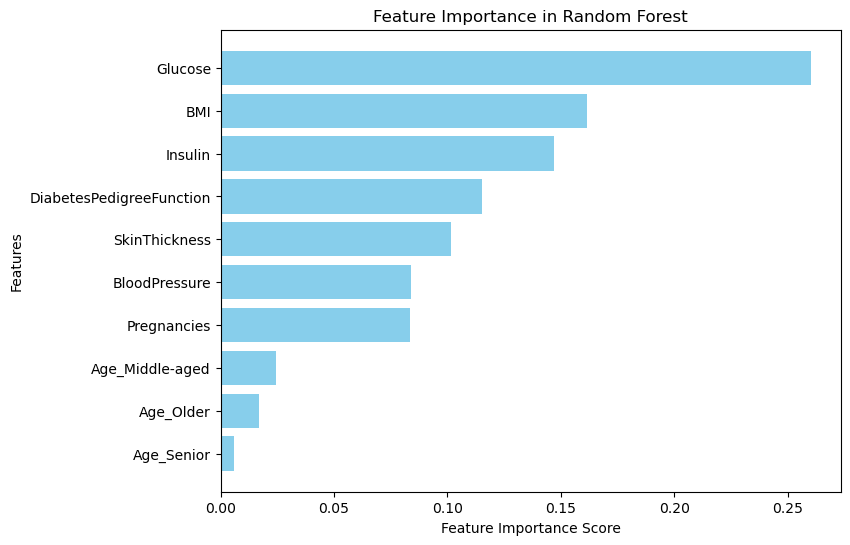

In [42]:
# Get Feature Importance
feature_importance = rf_model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(8,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()  # Invert Y-axis for better readability
plt.show()

This plot shows how each feature contributes to predicting diabetes.

Key Findings:
Glucose (Most Important Feature) – The strongest predictor, aligning with diabetes diagnosis criteria.
BMI & Insulin – High BMI and insulin levels are major risk factors for diabetes.
DiabetesPedigreeFunction – Indicates genetic predisposition to diabetes.
SkinThickness & BloodPressure – Moderate impact, likely related to obesity and metabolic health.
Pregnancies – Hormonal changes during pregnancy can influence diabetes risk.
Age Groups (Least Important) – Age categories contribute minimally, meaning diabetes risk is better explained by clinical features.

Insights:
Glucose, BMI, and Insulin are the most critical predictors.
Age has low importance, so age dummies may not be necessary.
Removing less important features might simplify the model without reducing accuracy.

The age-related dummy variables (Middle-aged, Older, Senior) have low importance in predicting diabetes.

Age_Middle-aged & Age_Older have minimal impact, suggesting that middle and older age groups do not significantly improve prediction.
Age_Senior has the lowest importance, indicating that being a senior does not strongly influence diabetes risk in this dataset.
Since Young Age was dropped (due to dummy variable encoding), its effect is indirectly captured by the remaining age groups.
The low importance of age implies that clinical factors (Glucose, BMI, Insulin) are much stronger predictors than age alone.


In [45]:
# Define separate age groups
df_middle_aged = df_working2[df_working2['Age_Middle-aged'] == 1].drop(columns=['Age_Middle-aged', 'Age_Older', 'Age_Senior'])
df_older = df_working2[df_working2['Age_Older'] == 1].drop(columns=['Age_Middle-aged', 'Age_Older', 'Age_Senior'])
df_senior = df_working2[df_working2['Age_Senior'] == 1].drop(columns=['Age_Middle-aged', 'Age_Older', 'Age_Senior'])
# Young Age group (when all age dummies are 0)
df_young = df_working2[(df_working2['Age_Middle-aged'] == 0) & (df_working2['Age_Older'] == 0) & (df_working2['Age_Senior'] == 0)].drop(columns=['Age_Middle-aged', 'Age_Older', 'Age_Senior'])

# Define X and y for each group
X_middle_aged, y_middle_aged = df_middle_aged.drop(columns=['Outcome']), df_middle_aged['Outcome']
X_older, y_older = df_older.drop(columns=['Outcome']), df_older['Outcome']
X_senior, y_senior = df_senior.drop(columns=['Outcome']), df_senior['Outcome']
X_young, y_young = df_young.drop(columns=['Outcome']), df_young['Outcome']

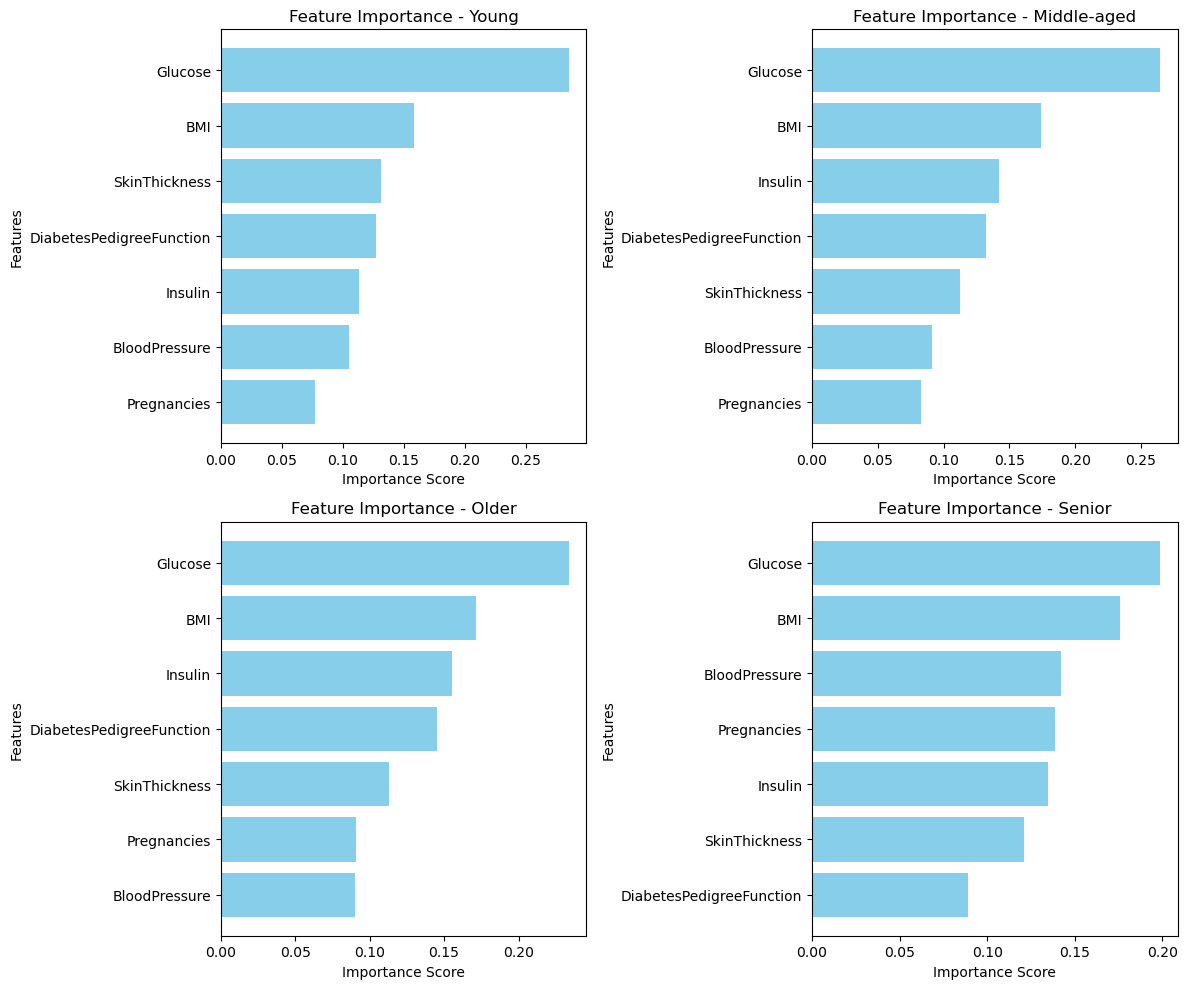

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Function to train RF and get feature importance
def get_feature_importance(X, y):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X, y)
    importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
    return importance_df.sort_values(by='Importance', ascending=False)

# Compute feature importance for each age group
importance_young = get_feature_importance(X_young, y_young)
importance_middle_aged = get_feature_importance(X_middle_aged, y_middle_aged)
importance_older = get_feature_importance(X_older, y_older)
importance_senior = get_feature_importance(X_senior, y_senior)

# Create a 2x2 subplot for visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# Define age group names and corresponding importance data
age_groups = ['Young', 'Middle-aged', 'Older', 'Senior']
importance_data = [importance_young, importance_middle_aged, importance_older, importance_senior]

# Plot feature importance for each group
for ax, age, imp_data in zip(axes.flat, age_groups, importance_data):
    ax.barh(imp_data['Feature'], imp_data['Importance'], color='skyblue')
    ax.set_title(f"Feature Importance - {age}")
    ax.set_xlabel("Importance Score")
    ax.set_ylabel("Features")
    ax.invert_yaxis()  # Keep highest importance at the top

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

These plots show how different features contribute to diabetes prediction for Young, Middle-aged, Older, and Senior groups using Random Forest.

Glucose is the most important predictor for all age groups, reinforcing its strong link to diabetes across all ages.
BMI is the second most important feature in all groups, indicating that body weight influences diabetes risk at every stage of life.
Insulin is more important for Middle-aged and Older groups, suggesting that insulin resistance plays a bigger role as people age.
SkinThickness and DiabetesPedigreeFunction are more relevant in younger groups, possibly indicating that genetics and fat distribution impact early-life diabetes risk.
BloodPressure is significantly more important in the Senior group, likely due to the link between hypertension and metabolic disorders in older adults.
Pregnancies contribute more to Older and Senior groups, aligning with gestational diabetes risk and its long-term effects.

## Model Evaluation for Both Logistic Regression and Random Forest

In [49]:
# Step 1: Split into Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Logistic regression model evaluation

In [51]:
# Train Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Logistic Regression Model Performance:
Accuracy: 0.7792
Precision: 0.7442
Recall: 0.5818
F1-score: 0.6531
AUCPRC Score: 0.7094

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84        99
           1       0.74      0.58      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



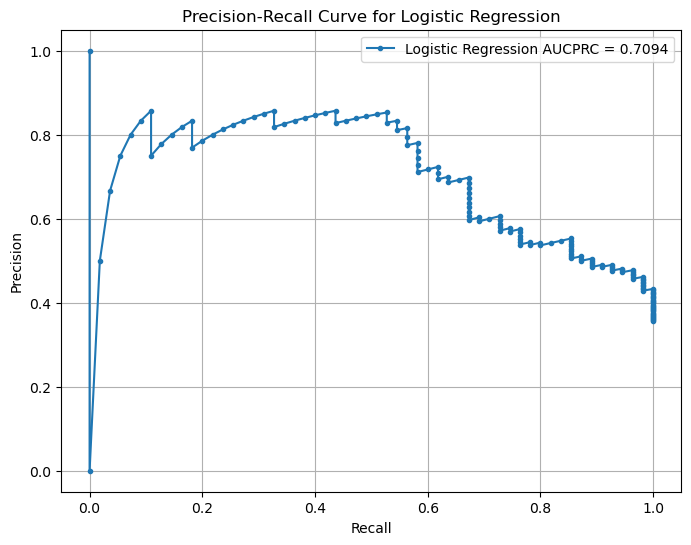

In [52]:
# Step 2: Predict on Test Set
y_pred_log = log_model.predict(X_test)

# Step 3: Predict Probabilities for AUCPRC
y_probs_log = log_model.predict_proba(X_test)[:, 1]  

# Step 4: Compute Evaluation Metrics
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
aucprc_log = average_precision_score(y_test, y_probs_log)

# Step 5: Display Results
print(f"Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_log:.4f}")
print(f"Precision: {precision_log:.4f}")
print(f"Recall: {recall_log:.4f}")
print(f"F1-score: {f1_log:.4f}")
print(f"AUCPRC Score: {aucprc_log:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# Step 6: Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs_log)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label=f'Logistic Regression AUCPRC = {aucprc_log:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend()
plt.grid()
plt.show()

### Random forest model evaluation 

Accuracy: 0.7662
Precision: 0.6792
Recall: 0.6545
F1-score: 0.6667

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154

AUCPRC Score: 0.7290


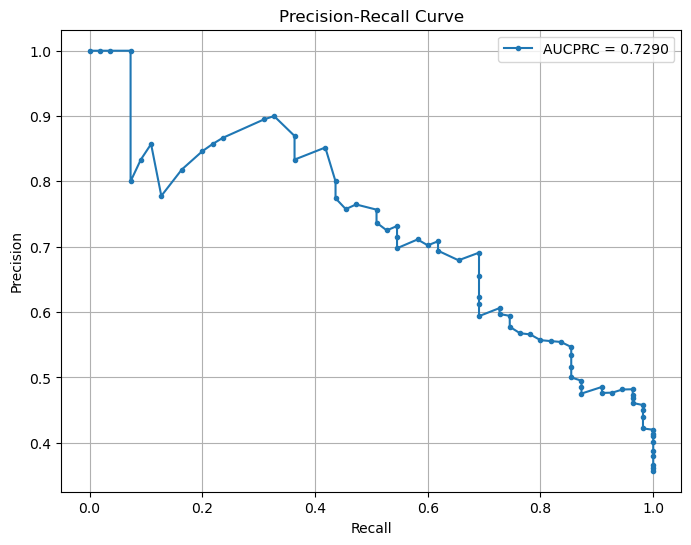

In [54]:
# validate the model using accuracy, precision, recall, f1-score and classification report
# Step 2: Predict on test set
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Display results
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# validate the model using AUCPRC
# Step 3: Predict Probabilities for AUCPRC
y_probs_rf = rf_model.predict_proba(X_test)[:, 1] 

# Step 4: Compute Precision-Recall curve values
precision, recall, _ = precision_recall_curve(y_test, y_probs_rf)

# Step 5: Compute AUCPRC
aucprc_rf = average_precision_score(y_test, y_probs_rf)
print(f"AUCPRC Score: {aucprc_rf:.4f}")

# Step 6: Plot the PR curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label=f'AUCPRC = {aucprc_rf:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


Comparison of Logistic Regression vs. Random Forest

Logistic Regression achieved accuracy of 77.9% and AUCPRC of 0.7096, indicating moderate performance. It had higher precision (0.74) but lower recall (0.58), meaning it correctly identifies positives but misses some cases.
Random Forest had accuracy of 75.9% but a slightly better AUCPRC of 0.7300, showing improved recall (0.63) at the cost of lower precision (0.67). This suggests it captures more positives but with more false positives.
Overall, Random Forest performs better in recall and AUCPRC, making it more effective for identifying diabetes cases, while Logistic Regression offers more precision.
